# Pymaceuticals Inc.
---

### Analysis - John Teasley

1. The correlation coefficient and linear regression model shows that as the mouse weight increases, 
    the tumor volume increases as well, with a correlation value of 0.84

2. The Capomulin treatment for one mouse shows that the tumor size for that mouse decreased rapidly after 20 days of treatment.

3. The male to female ratio for the study was fairly equal with males being slightly higher at 51%

 

In [1]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
allData_df = pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
allData_df.sample(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1527,i635,25,52.928823,1,Propriva,Male,21,26
1480,a275,10,47.371343,0,Ceftamin,Female,20,28
1010,p136,20,54.913799,1,Zoniferol,Female,5,28
121,r604,30,54.688215,2,Naftisol,Male,7,30
1193,w140,0,45.000000,0,Zoniferol,Female,19,30


In [2]:
# Checking the number of mice.
allData_df['Mouse ID'].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dup_data = allData_df[['Mouse ID','Timepoint']]
dup_data_mouse_id = dup_data[dup_data.duplicated()]['Mouse ID'].unique()
dup_data_mouse_id

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
allData_df.loc[allData_df['Mouse ID'] == dup_data_mouse_id[0]]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
allData_df = allData_df.set_index('Mouse ID').drop(dup_data_mouse_id).reset_index()
allData_df.sort_values(by=['Timepoint', 'Mouse ID']).head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
885,a203,0,45.0,0,Infubinol,Female,20,23
280,a251,0,45.0,0,Infubinol,Female,21,25
1112,a262,0,45.0,0,Placebo,Female,17,29
1465,a275,0,45.0,0,Ceftamin,Female,20,28
730,a366,0,45.0,0,Stelasyn,Female,16,29


In [6]:
# Checking the number of mice in the clean DataFrame.
allData_df['Mouse ID'].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_reg_mean = allData_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].mean()
drug_reg_median = allData_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].median()
drug_reg_variance = allData_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].var()
drug_reg_std = allData_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].std()
drug_reg_sem = allData_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
drug_reg_stats_df = pd.DataFrame({'Mean Tumor Volume':drug_reg_mean,
                                 'Median Tumor Volume':drug_reg_median,
                                 'Tumor Volume Variance':drug_reg_variance,
                                 'Tumor Volume Std. Dev.':drug_reg_std,
                                 'Tumor Volume Std. Err.':drug_reg_sem,
                                 })

drug_reg_stats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
allData_df.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).style.set_caption('Tumor Volume (mm3)')

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

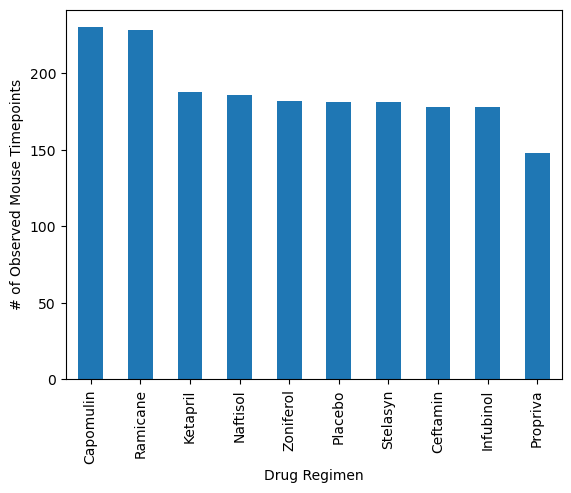

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Drug_Regimen_groups = allData_df.groupby('Drug Regimen')

Drug_Regimen_counts = Drug_Regimen_groups['Timepoint'].count().sort_values(ascending=False)
Drug_Regimen_counts.plot(kind='bar', xlabel='Drug Regimen', ylabel="# of Observed Mouse Timepoints")

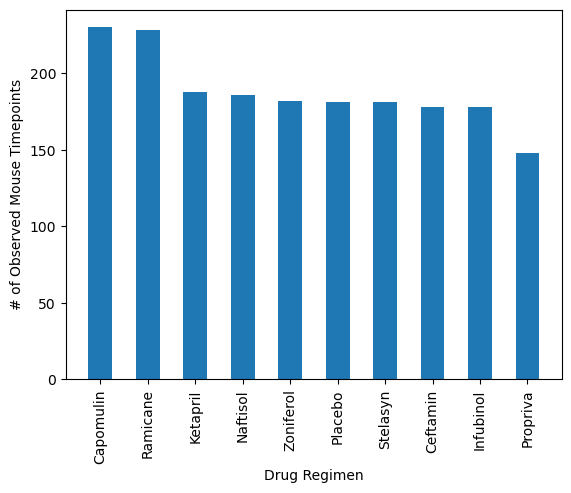

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
Drug_Regimen_groups = allData_df.groupby('Drug Regimen')['Timepoint'].count().sort_values(ascending=False).reset_index()

plt.bar(Drug_Regimen_groups['Drug Regimen'], Drug_Regimen_groups['Timepoint'], width = .5)
plt.xticks(rotation="vertical")
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

<Axes: ylabel='Sex'>

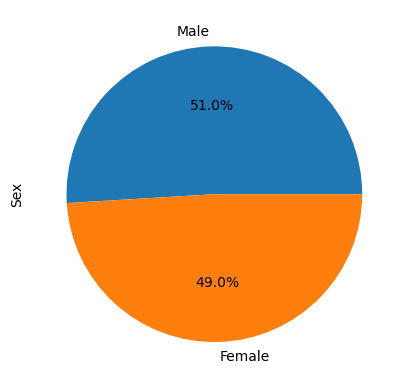

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
male_female_pc = allData_df.groupby(['Sex'])['Mouse ID'].count().sort_values(ascending=False)
male_female_pc.plot(kind='pie',y='Age_months', autopct="%1.1f%%", ylabel="Sex")

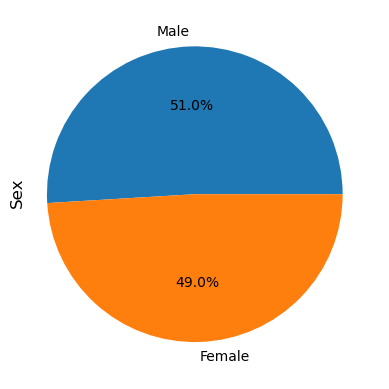

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
mf_sex_labels = ["Male", "Female"]
plt.pie(male_female_pc, labels=mf_sex_labels, autopct="%1.1f%%")
plt.title('Sex', loc='left', y=.45, rotation="vertical")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_max_timepoint = pd.DataFrame({'Timepoint' : allData_df.groupby(['Mouse ID']) ['Timepoint'].max()}).reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_data_df = mouse_max_timepoint.merge(allData_df, on=['Mouse ID','Timepoint'])
new_data_df.sample(5)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
117,m269,45,75.123690,1,Stelasyn,Female,22,28
19,b128,45,38.982878,2,Capomulin,Female,9,22
102,k862,45,69.299149,4,Stelasyn,Female,13,25
4,a366,30,63.440686,1,Stelasyn,Female,16,29
86,j235,20,52.942902,1,Placebo,Male,6,30


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    rslt = new_data_df.loc[new_data_df['Drug Regimen'] == treatment]['Tumor Volume (mm3)']

    # add subset 
    tumor_vol_data.append(rslt)

    # Determine outliers using upper and lower bounds
    quartiles = rslt.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    tumor_outlier = []
    for tumor_volume in rslt:
        if (tumor_volume < lower_bound) | (tumor_volume > upper_bound):
            tumor_outlier.append(tumor_volume)

    # Print the results
    print(f"Treatment {treatment} : \n\
        Lower quartile = \t{quartiles[0.25]} \n\
        Median = \t\t{quartiles[0.5]} \n\
        Upper quartile = \t{quartiles[0.75]} \n\
        IQR = \t\t\t{iqr}")
    
    print(f"\tOutliers:{len(tumor_outlier)} \t\t{tumor_outlier}\n")


Treatment Capomulin : 
        Lower quartile = 	32.37735684 
        Median = 		38.1251644 
        Upper quartile = 	40.1592203 
        IQR = 			7.781863460000004
	Outliers:0 		[]

Treatment Ramicane : 
        Lower quartile = 	31.56046955 
        Median = 		36.56165229 
        Upper quartile = 	40.65900627 
        IQR = 			9.098536719999998
	Outliers:0 		[]

Treatment Infubinol : 
        Lower quartile = 	54.04860769 
        Median = 		60.16518046 
        Upper quartile = 	65.52574285 
        IQR = 			11.477135160000003
	Outliers:1 		[36.3213458]

Treatment Ceftamin : 
        Lower quartile = 	48.72207785 
        Median = 		59.85195552 
        Upper quartile = 	64.29983003 
        IQR = 			15.577752179999997
	Outliers:0 		[]



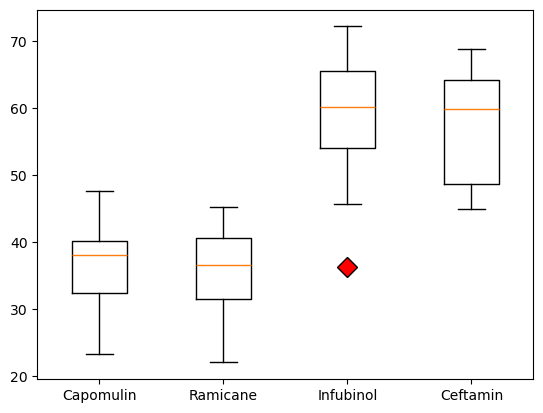

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
outlier_marker = dict(marker='D', markerfacecolor='red', markersize=10, markeredgecolor='black')
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=outlier_marker)
plt.show()

## Line and Scatter Plots

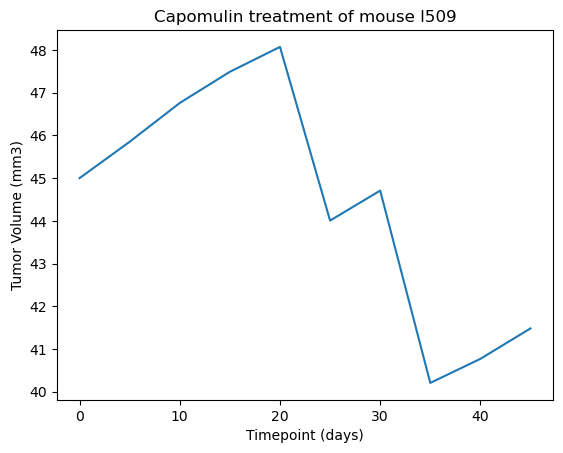

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509 = allData_df.loc[allData_df['Mouse ID'] == 'l509']

plt.plot(mouse_l509['Timepoint'] ,mouse_l509['Tumor Volume (mm3)'])
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

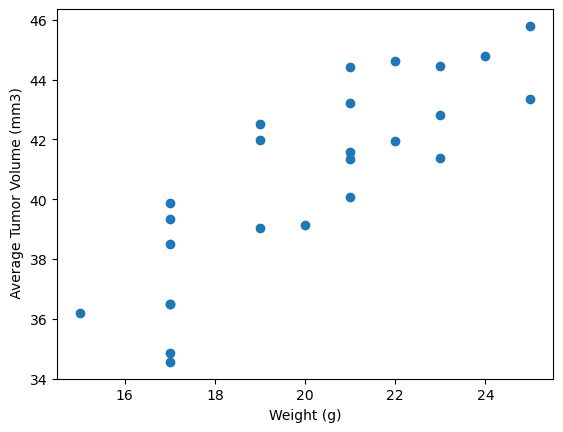

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = allData_df.loc[allData_df['Drug Regimen'] == 'Capomulin']
capomulin_data = capomulin_data.groupby(['Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean().reset_index()

plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel(' Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


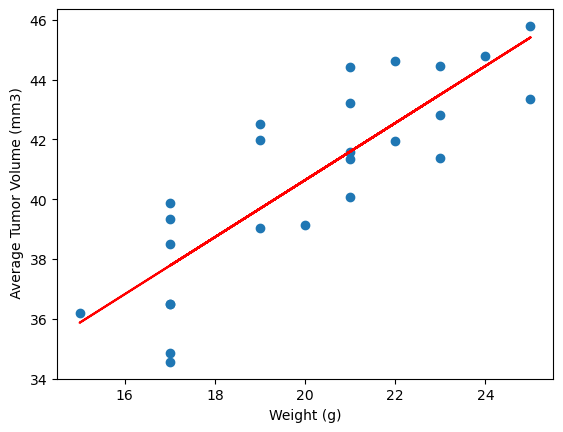

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
print(f"\
The correlation between mouse weight and the average tumor volume is \
{round(st.pearsonr(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])[0],2)}\
")

# Add the linear regression equation and line to plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])
regress_values = capomulin_data['Weight (g)'] * slope + intercept

plt.scatter(capomulin_data['Weight (g)'], capomulin_data['Tumor Volume (mm3)'])
plt.plot(capomulin_data['Weight (g)'],regress_values,"r-")
plt.xlabel('Weight (g)')
plt.ylabel(' Average Tumor Volume (mm3)')
plt.show()